<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#KM-CD8" data-toc-modified-id="KM-CD8-4.1">KM CD8</a></span></li><li><span><a href="#Cox-CD8" data-toc-modified-id="Cox-CD8-4.2">Cox CD8</a></span></li><li><span><a href="#KM-CD3" data-toc-modified-id="KM-CD3-4.3">KM CD3</a></span></li><li><span><a href="#Cox-CD3" data-toc-modified-id="Cox-CD3-4.4">Cox CD3</a></span></li></ul></li></ul></div>

# Dependencies

In [8]:
library(survival)
library(survminer)
library(forestmodel)

Loading required package: ggpubr



# Functions

In [1]:
source("~/git/iMATRIX-Atezo_Biomarker/R/ggplot2_theme.R")
source("~/git/iMATRIX-Atezo_Biomarker/R/Heatmap_functions.R")

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




# Paths

In [2]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Plots/"

# Main

In [3]:
IND_metadata <- read.csv(file.path(datapath,"IND_estimate_metadata_IHC_trb_tmb.csv"),
                         header = T, stringsAsFactors = F, check.names = F)

## KM CD8

In [4]:
summary(IND_metadata$IHC_CD8)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.010   0.070   0.220   1.149   1.242  10.280 

In [5]:
summary(IND_metadata$IHC_PDL1IC)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.500   5.177   1.000  60.000       4 

In [6]:
IND_metadata$CD8group <- NA

IND_metadata$CD8group[IND_metadata$IHC_CD8 >= 1.242] <- "High"

IND_metadata$CD8group[IND_metadata$IHC_CD8 > 0.070 &
                      IND_metadata$IHC_CD8 < 1.242] <- "Intermediate"

IND_metadata$CD8group[IND_metadata$IHC_CD8 <= 0.070] <- "Low"

In [9]:
sfit <- survfit(Surv(TRTDUR, progressed)~ CD8group, data= IND_metadata)
    
kmplot <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                     pval = TRUE, pval.size = 8, pval.coord = c(300, 0.75),
                     risk.table=TRUE, fontsize = 8,
                     legend = c(0.7, 0.95), font.legend = 16, legend.title = "",
                     font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmplot$table <- kmplot$table + theme(axis.text.x = element_text(size = 20))
kmplot$plot <- kmplot$plot + labs(title = "PFS analysis of CD8 protein expression")

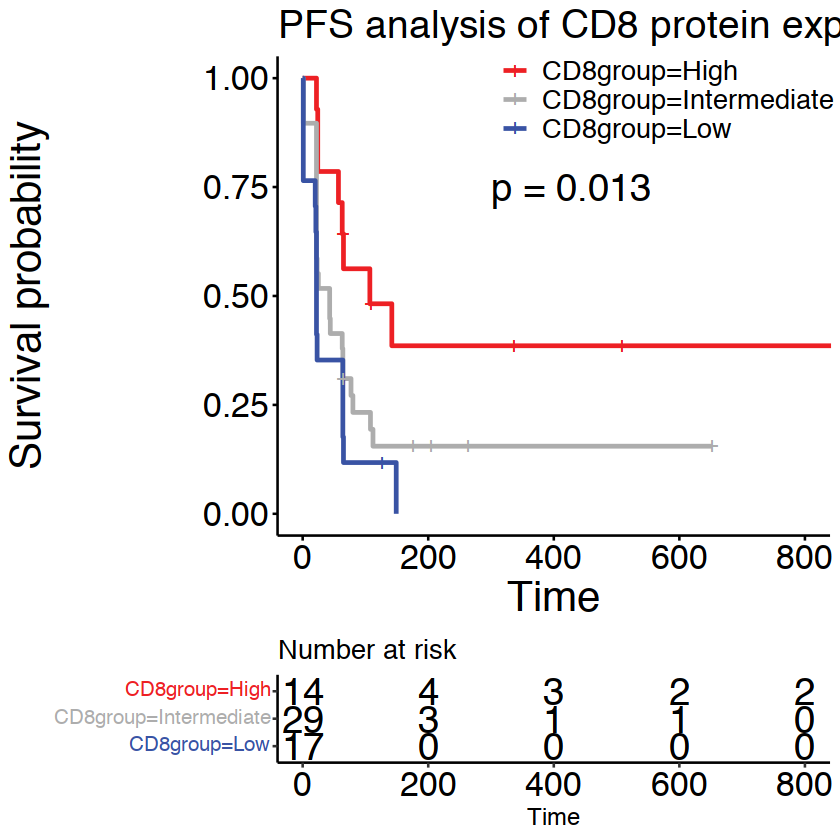

In [10]:
kmplot

In [11]:
pdf(file = paste0(plotpath,"KM_CD8_IHC.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmplot
dev.off()

pdf 
  2

## Cox CD8

In [12]:
IND_metadata$CD8group <- factor(IND_metadata$CD8group,
                               levels = c("Low", "Intermediate", "High"))

In [13]:
options(scipen = 999)

In [14]:
table(IND_metadata$sample_origin)


         Adrenal gland                   Bone                  Brain 
                     5                      7                      5 
Connective/Soft tissue                 Kidney                   Lung 
                    10                      5                     11 
            Lymph node                 Others 
                    11                     12 

In [15]:
coxmodel <- coxph(Surv(TRTDUR, progressed) ~ IHC_CD8 + sample_origin + AGE,
                  data = IND_metadata)
summary(coxmodel)

Call:
coxph(formula = Surv(TRTDUR, progressed) ~ IHC_CD8 + sample_origin + 
    AGE, data = IND_metadata)

  n= 60, number of events= 49 
   (6 observations deleted due to missingness)

                                        coef exp(coef) se(coef)      z Pr(>|z|)
IHC_CD8                             -0.28728   0.75030  0.13211 -2.175   0.0297
sample_originBone                    0.41405   1.51294  0.67537  0.613   0.5398
sample_originBrain                   0.54572   1.72586  0.71744  0.761   0.4469
sample_originConnective/Soft tissue  0.41727   1.51781  0.64623  0.646   0.5185
sample_originKidney                  0.26797   1.30731  0.75849  0.353   0.7239
sample_originLung                    0.08715   1.09106  0.67028  0.130   0.8966
sample_originLymph node             -0.31580   0.72921  0.73874 -0.427   0.6690
sample_originOthers                 -0.35859   0.69866  0.69064 -0.519   0.6036
AGE                                 -0.00180   0.99820  0.03274 -0.055   0.9562
              

In [16]:
cd8_cox <- forest_model(coxmodel,exponentiate = TRUE) + 
labs(title = "Cox for CD8 protein expression")

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


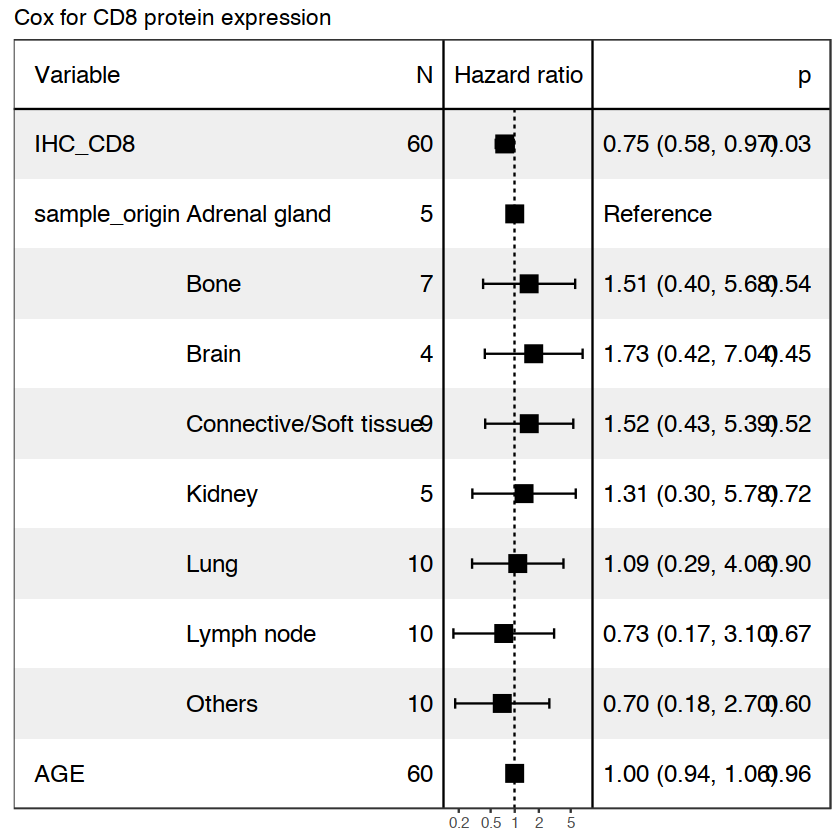

In [17]:
cd8_cox

In [18]:
pdf(file = paste0(plotpath,"CD8_IHC_cox.pdf"),
    width = 8, 
    height = 10,
    useDingbats = FALSE)

cd8_cox

dev.off()

pdf 
  2

## KM CD3

In [19]:
summary(IND_metadata$IHC_CD3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0006  0.1600  0.5700  6.1304  3.0500 69.1000       9 

In [20]:
IND_metadata$CD3group <- NA
IND_metadata$CD3group[IND_metadata$IHC_CD3 >= 3.05] <- "High"

IND_metadata$CD3group[IND_metadata$IHC_CD3 > 0.16 &
                      IND_metadata$IHC_CD3 < 3.05] <- "Intermediate"

IND_metadata$CD3group[IND_metadata$IHC_CD3 <= 0.16] <- "Low"

In [21]:
sfit <- survfit(Surv(TRTDUR, progressed)~ CD3group, data= IND_metadata)
    
kmplot <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                     pval = TRUE, pval.size = 8, pval.coord = c(300, 0.75),
                     risk.table=TRUE, fontsize = 8,
                     legend = c(0.7, 0.95), font.legend = 16, legend.title = "",
                     font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmplot$table <- kmplot$table + theme(axis.text.x = element_text(size = 20))
kmplot$plot <- kmplot$plot + labs(title = "PFS analysis of CD3 protein expression")

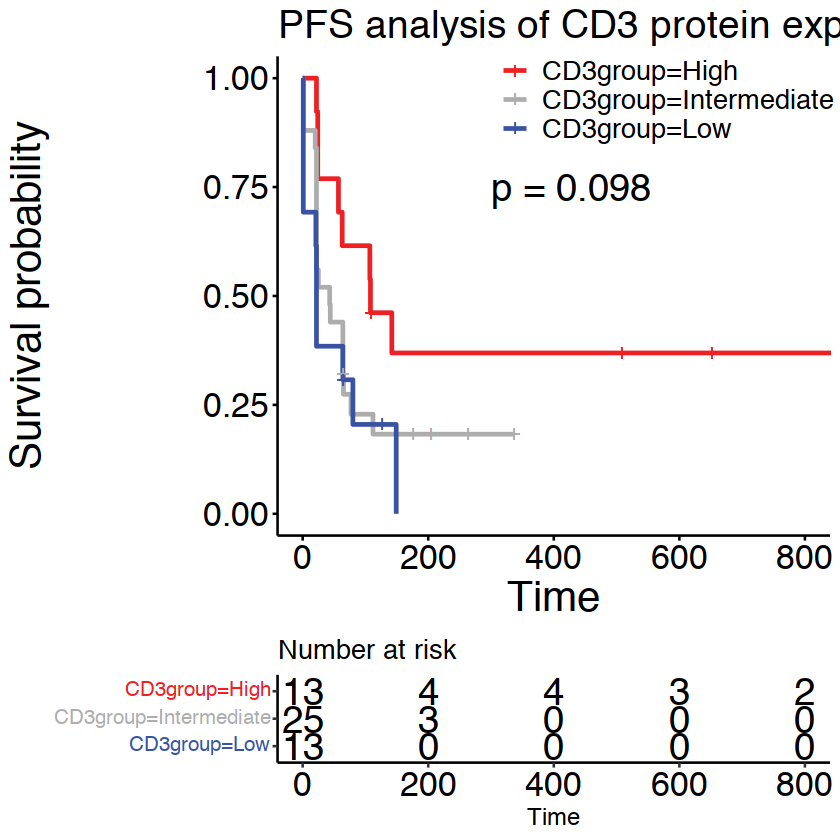

In [22]:
kmplot

In [23]:
pdf(file = paste0(plotpath,"KM_CD3_IHC.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmplot
dev.off()

pdf 
  2

## Cox CD3

In [24]:
coxmodel <- coxph(Surv(TRTDUR, progressed) ~ IHC_CD3 + sample_origin + AGE, data = IND_metadata)
summary(coxmodel)

Call:
coxph(formula = Surv(TRTDUR, progressed) ~ IHC_CD3 + sample_origin + 
    AGE, data = IND_metadata)

  n= 51, number of events= 40 
   (15 observations deleted due to missingness)

                                        coef exp(coef) se(coef)      z Pr(>|z|)
IHC_CD3                             -0.02011   0.98009  0.01559 -1.290    0.197
sample_originBone                    0.47899   1.61444  0.79699  0.601    0.548
sample_originBrain                   0.65359   1.92243  0.77023  0.849    0.396
sample_originConnective/Soft tissue  0.45966   1.58354  0.71201  0.646    0.519
sample_originKidney                  0.09643   1.10124  0.83675  0.115    0.908
sample_originLung                    0.11335   1.12003  0.73626  0.154    0.878
sample_originLymph node             -0.48494   0.61573  0.77292 -0.627    0.530
sample_originOthers                 -0.65830   0.51773  0.79627 -0.827    0.408
AGE                                  0.01547   1.01559  0.03445  0.449    0.653

            

In [25]:
cd3_cox <- forest_model(coxmodel,exponentiate = TRUE) + labs(title = "Cox for CD3 protein expression")

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


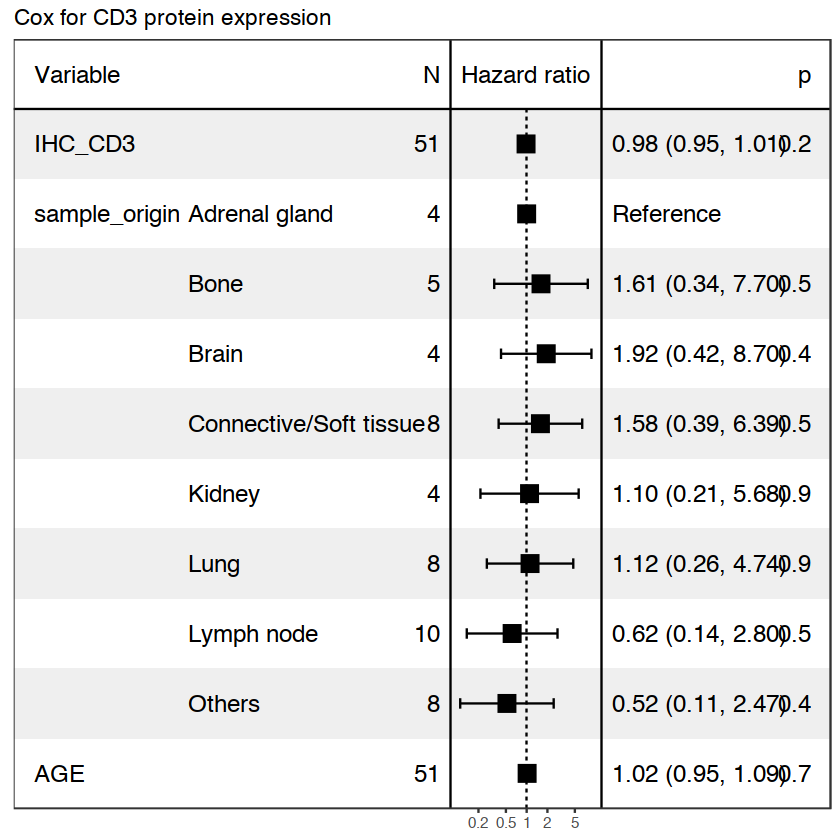

In [26]:
cd3_cox

In [27]:
pdf(file = paste0(plotpath,"CD3_IHC_cox.pdf"),
    width = 8, 
    height = 10,
    useDingbats = FALSE)

cd3_cox

dev.off()

pdf 
  2